# ML Course 8 - Practice on discriminant analysis

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

$\pi$

**Loading the data set from Scikit-Learn**

In [4]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [5]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

**Getting a description of the data set**

In [6]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [7]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [9]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


In [10]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

**To make it easier to do visual check of the data, we remove the encoding**

In [11]:
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


## Subject

* As a start, we consider mean radius as unique predictor and we will compute a Linear Discrimant Analysis by hand.
  * Plot the data set on one axis (the mean radius axis) and give colors to distinguish the tumor type of each dot (i.e. each class)
  * Compute the estimated center of each class, i.e. $\hat{\mu}_k$ for $k \in \left\{0, 1\right\}$ (0 coding benign and 1 coding malignant). Add the center dots on your plot.
  * Compute the estimated prior $\hat{\pi}_k$ and variance $\hat{\sigma}_k^2$ of each class.
  * Plot the posterior of each class, i.e. the probability that a new observation comes from class $k$, knowing its mean radius value. We assume that these probality function follows a Gaussian distribution whose parameters have been computed in the previous questions.
  * According to the plot, what approximate value(s) of mean radius corresponds to the decision boundary?
  * *Optional question: check that by solving the equation of discriminant equality $\delta_0\left(x\right) = \delta_1\left(x\right)$. To simplify the solving, you can consider that the standard deviations $\hat{\sigma}_k$ are the same (take the mean value of $\hat{\sigma}_k$).* 
  * Use LinearDiscriminantAnalysis (from sklearn.discriminant_analysis) to train a model and make several predictions around the decision boundary to check.
* We consider two predictors now: mean radius and mean texture.
  * Plot on a first figure the data in the 2D-predictor space with colors corresponding to the tumor type
  * Display on that first figure the decision areas based on the logistic regression classifier trained on the two predictors (see practice #6)
  * Train a Linear Discriminant Analysis on the two predictors and display the decision areas on a second figure
  * Train a Quadratic Discriminant Analysis on the two predictors and display the decision areas on a third figure
  * *Optional question: compare the performances of that three models*

## Suggestion of correction

**As a start, we consider mean radius as unique predictor and we will compute a Linear Discrimant Analysis by hand.**

Let's first create sublists corresponding to each class value.

In [12]:
X_0 = features['mean radius'][target['tumor type'] == 'benign']
X_1 = features['mean radius'][target['tumor type'] == 'malignant']

In [13]:
# Length of each list
n_0 = len(X_0)
n_1 = len(X_1)

n_0, n_1

(357, 212)

* Plot the data set on one axis (the mean radius axis) and give colors to distinguish the tumor type of each dot (i.e. each class)

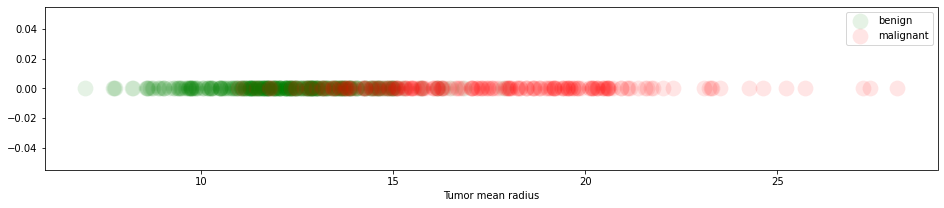

In [14]:
fig = plt.figure(figsize=(16,3))
plt.scatter(X_0, np.zeros(n_0), c='green', label='benign', marker='.', s=1000, alpha=0.1, lw=0)
plt.scatter(X_1, np.zeros(n_1), c='red', label='malignant', marker='.', s=1000, alpha=0.1, lw=0)
plt.xlabel('Tumor mean radius')
plt.legend()
plt.show()

* Compute the estimated center of each class, i.e. $\hat{\mu}_k$ for $k \in \left\{0, 1\right\}$ (0 coding benign and 1 coding malignant). Add the center dots on your plot.

In [15]:
# Mean values
mu_0 = np.mean(X_0)
mu_1 = np.mean(X_1)

mu_0, mu_1

(12.146523809523808, 17.462830188679245)

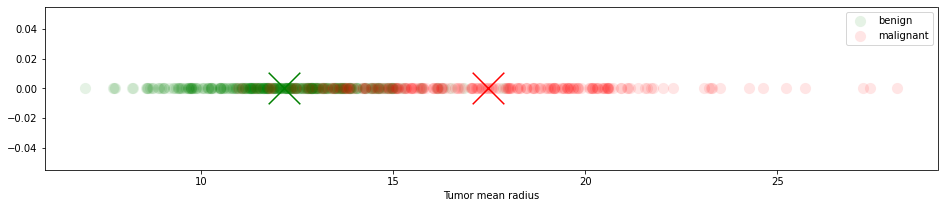

In [20]:
fig = plt.figure(figsize=(16,3))
plt.scatter(X_0, np.zeros(n_0), c='green', label='benign', marker='.', s=500, alpha=0.1, lw=0)
plt.scatter(X_1, np.zeros(n_1), c='red', label='malignant', marker='.', s=500, alpha=0.1, lw=0)
plt.scatter(mu_0, 0, c='green', marker='x', s=1000)
plt.scatter(mu_1, 0, c='red', marker='x', s=1000)
plt.xlabel('Tumor mean radius')
plt.legend()
plt.show()

* Compute the estimated prior $\hat{\pi}_k$ and variance $\hat{\sigma}_k^2$ of each class.

In [15]:
# Priors
pi_0 = n_0 / (n_0 + n_1)
pi_1 = n_1 / (n_0 + n_1)

pi_0, pi_1

(0.6274165202108963, 0.37258347978910367)

In [16]:
# Variances
var_0 = 1/(len(X_0) - 1) * sum((X_0 - mu_0)**2)
var_1 = 1/(len(X_1) - 1) * sum((X_1 - mu_1)**2)

In [17]:
# Standard deviations
sigma_0 = np.sqrt(var_0)
sigma_1 = np.sqrt(var_1)

sigma_0, sigma_1

(1.7805116461410386, 3.2039711007793663)

In [18]:
# Alternative:
# sigma_0 = np.std(X_0, ddof=1)
# sigma_1 = np.std(X_1, ddof=1)
# sigma_0, sigma_1

* Plot the posterior of each class, i.e. the probability that a new observation comes from class $k$, knowing its mean radius value. We assume that the probality functions follow Gaussian distributions whose parameters have been computed in the latter questions.

In [19]:
# Prepare a list of x values
x = np.arange(0, 30, 0.1)

# Compute the numerator of the posterior expression, i.e. P(X,Y)
p_0_num = pi_0 * 1/(sigma_0 * np.sqrt(2*np.pi)) * np.exp(-1/2*(((x - mu_0)/sigma_0)**2))
p_1_num = pi_1 * 1/(sigma_1 * np.sqrt(2*np.pi)) * np.exp(-1/2*(((x - mu_1)/sigma_1)**2))

# Compute the denominator, i.e. P(X)
p_denom = p_0_num + p_1_num

# Deduce the posterior, i.e. P(Y|X)
p_0 = p_0_num / p_denom
p_1 = p_1_num / p_denom

# Alternative with a loop instead of list operations
# p_0 = [p_0_num[i] / (p_0_num[i] + p_1_num[i]) for i in range(len(x))]
# p_1 = [p_1_num[i] / (p_0_num[i] + p_1_num[i]) for i in range(len(x))]

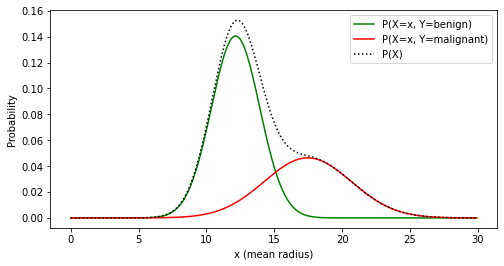

In [20]:
# Plot the numerators first
plt.figure(figsize=(8,4))
plt.plot(x, p_0_num, c='green', label='P(X=x, Y=benign)')
plt.plot(x, p_1_num, c='red', label='P(X=x, Y=malignant)')

# Plot the denominator too
plt.plot(x, p_denom, c='black', label='P(X)', linestyle=':')

plt.legend()
plt.ylabel('Probability')
plt.xlabel('x (mean radius)')
plt.show()

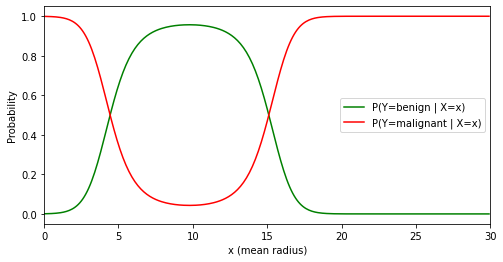

In [21]:
# Plot the posteriors
plt.figure(figsize=(8,4))
plt.plot(x, p_0, c='green', label='P(Y=benign | X=x)')
plt.plot(x, p_1, c='red', label='P(Y=malignant | X=x)')

plt.legend()
plt.xlim([0,30])
plt.ylabel('Probability')
plt.xlabel('x (mean radius)')
plt.show()

We can see that the lines intersect twice, meaning that we have two boundaries (the two solutions of the quadratic problem). Here, it is due to the fact $\sigma_0$ and $\sigma_1$ are not exactly equal (the linear assumption is not 100 % satisfied).<br>
Nonetheless, in that context, it does not make a lot of sense to make prediction for unlikely values of x, so we will limit the range of x where P(X=x) is not too small.

In [22]:
p_0[p_denom < 1e-2] = None
p_1[p_denom < 1e-2] = None

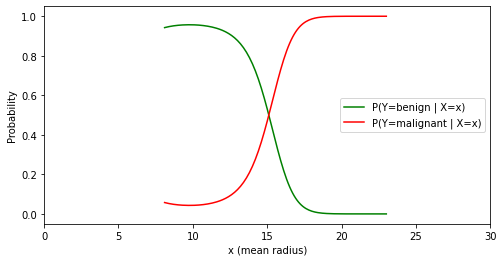

In [23]:
# Plot the posteriors
plt.figure(figsize=(8,4))
plt.plot(x, p_0, c='green', label='P(Y=benign | X=x)')
plt.plot(x, p_1, c='red', label='P(Y=malignant | X=x)')

plt.legend()
plt.xlim([0,30])
plt.ylabel('Probability')
plt.xlabel('x (mean radius)')
plt.show()

* According to the plot, what value of mean radius corresponds to the decision boundary?

We can see from the plot (lines intersection) that the decision boundary corresponds to a value of x close to 15.

* *Optional question: check that by solving the equation of discriminant equality $\delta_0\left(x\right) = \delta_1\left(x\right)$*

With simplifying hypothesis: $\sigma_0$ = $\sigma_1 \approx 2.5$ (linear boundary). Hence, we can use this expression for the discriminant: $\delta_k\left(x\right) = x\frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log\left(\pi_k\right)$ <br>
The equation $\delta_0\left(x\right) = \delta_1\left(x\right)$ gives $x = \frac{\mu_0+\mu_1}{2} + \frac{\sigma^2}{\mu_0-\mu_1}\log\left(\frac{\pi_1}{\pi_0}\right)$

In [24]:
sigma = 2.5
sigma = (sigma_0 + sigma_1) / 2
boundary_approx = (mu_0 + mu_1)/2 + sigma**2 / (mu_0 - mu_1) * np.log(pi_1/pi_0)
print('Computed boundary (approximation): ' + str(boundary_approx))

Computed boundary (approximation): 15.413558154144427


Without simplifying hypothesis: $\delta_k\left(x\right) = -x^2\frac{1}{2\sigma_k^2} + x\frac{\mu_k}{\sigma_k^2} - \frac{\mu_k^2}{2\sigma_k^2} + \log\left(\frac{\pi_k}{\sigma_k}\right)$ <br>
We write it under the form $\delta_k\left(x\right) = a_k x^2 + b_k x + c_k$ so we can solve $\delta_0\left(x\right) = \delta_1\left(x\right)$ i.e. $(a_1-a_0) x^2 + (b_1-b_0) x + (c_1-c_0) = 0$

In [25]:
a_0 = -1/(2*sigma_0**2)
a_1 = -1/(2*sigma_1**2)
b_0 = mu_0/sigma_0**2
b_1 = mu_1/sigma_1**2
c_0 = -mu_0**2/(2*sigma_0**2) + np.log(pi_0/sigma_0)
c_1 = -mu_1**2/(2*sigma_1**2) + np.log(pi_1/sigma_1)

a = a_1 - a_0
b = b_1 - b_0
c = c_1 - c_0

delta = b**2 - 4*a*c
boundary_first = (-b - np.sqrt(delta)) / (2*a)
boundary_second = (-b + np.sqrt(delta)) / (2*a)

print('One solution of the equation is ' + str(boundary_first) + '. Since out of range, we will not consider it.')
print('Computed boundary (exact value): ' + str(boundary_second))

One solution of the equation is 4.438146860117396. Since out of range, we will not consider it.
Computed boundary (exact value): 15.104126047624998


This value corresponds to what we would guess visually. Note that the approximate value is quite close to the exact value.

* Use LinearDiscriminantAnalysis (from sklearn.discriminant_analysis) to train a model and make several predictions around the decision boundary to check.

In [26]:
# Feature
X = features['mean radius'].values.reshape(-1,1)

In [27]:
# Encoding
y = target.replace({data_all.target_names[0]:1, data_all.target_names[1]:0})
y.sample(n=8, random_state=1)

,tumor type
421,0
47,1
292,0
186,1
414,1
132,1
161,1
197,1


In [28]:
# Change shape of y from (n,1) to (n,)
y = y.values.reshape(-1,)

In [29]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 1) (426,)
Test set: (143, 1) (143,)


In [30]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
# Training the LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [32]:
# Making predictions
for x in np.arange(15,16,0.1):
    print('Prediction for x = ' + str(round(x,1)) + ': ' + str(lda.predict(sc.transform([[x]]))))

Prediction for x = 15.0: [0]
Prediction for x = 15.1: [0]
Prediction for x = 15.2: [0]
Prediction for x = 15.3: [0]
Prediction for x = 15.4: [0]
Prediction for x = 15.5: [1]
Prediction for x = 15.6: [1]
Prediction for x = 15.7: [1]
Prediction for x = 15.8: [1]
Prediction for x = 15.9: [1]


Here we can see that the decision boundary is between 15.4 and 15.5. It is coherent with the value we have computed with the linear assumption (15.42).

##### We consider two predictors now: mean radius and mean texture.

* Plot on a first figure the data in the 2D-predictor space with colors corresponding to the tumor type

In [33]:
# Define feature
X = features[['mean radius', 'mean texture']].values

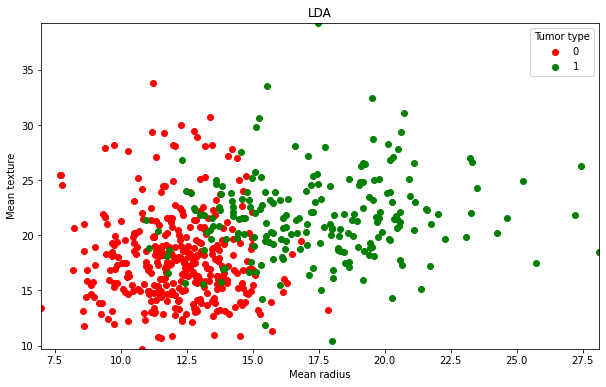

In [34]:
X_set, y_set = X, y

fig, axs = plt.subplots(1,1, figsize=(10,6))

for i, y_set_value in enumerate(np.unique(y_set)):
    axs.scatter(X_set[y_set == y_set_value, 0], X_set[y_set == y_set_value, 1], color = ['red', 'green'][i], label = y_set_value)

axs.set_xlim(X_set[:,0].min(), X_set[:,0].max())
axs.set_ylim(X_set[:,1].min(), X_set[:,1].max())
axs.legend(title='Tumor type')
axs.set_title('LDA')
axs.set_xlabel('Mean radius')
axs.set_ylabel('Mean texture')

plt.show() 

* Display on that first figure the decision areas based on the logistic regression classifier trained on the two predictors (see practice #6)

In [35]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 2) (426,)
Test set: (143, 2) (143,)


In [36]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_2 = StandardScaler()
X_train = sc_2.fit_transform(X_train)
X_test = sc_2.transform(X_test)

In [37]:
# Training the logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = {'classifier': LogisticRegression()}
log_reg['classifier'].fit(X_train, y_train)

LogisticRegression()

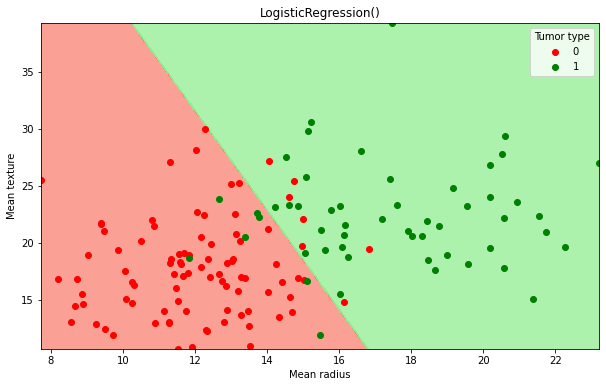

In [38]:
classifier = log_reg['classifier']

from matplotlib.colors import ListedColormap

# Prepare the space grid
X_set, y_set = sc_2.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.03), 
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.03))

# Decision areas
fig, axs = plt.subplots(1,1, figsize=(10,6))
axs.contourf(X1, X2, classifier.predict(sc_2.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
     alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))

# Scatter plot
for i, y_set_value in enumerate(np.unique(y_set)):
    axs.scatter(X_set[y_set == y_set_value, 0], X_set[y_set == y_set_value, 1], color = ['red', 'green'][i], label = y_set_value)

# Figure parameters
axs.set_xlim(X_set[:,0].min(), X_set[:,0].max())
axs.set_ylim(X_set[:,1].min(), X_set[:,1].max())
axs.legend(title='Tumor type')
axs.set_title(str(classifier))
axs.set_xlabel('Mean radius')
axs.set_ylabel('Mean texture')

plt.show() 

* Train a Linear Discriminant Analysis on the two predictors and display the decision areas on a second figure

In [39]:
# Training the LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = {'classifier': LinearDiscriminantAnalysis()}
lda['classifier'].fit(X_train, y_train)

LinearDiscriminantAnalysis()

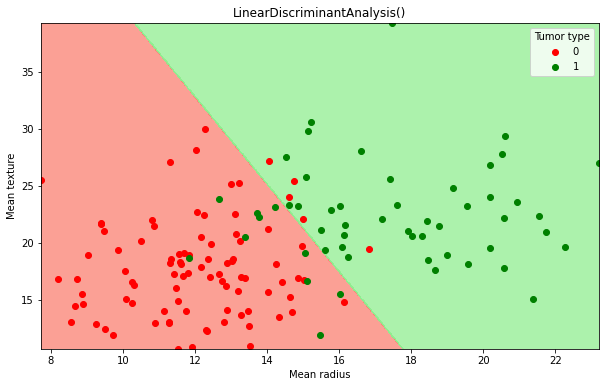

In [40]:
classifier = lda['classifier']

from matplotlib.colors import ListedColormap

# Prepare the space grid
X_set, y_set = sc_2.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.03), 
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.03))

# Decision areas
fig, axs = plt.subplots(1,1, figsize=(10,6))
axs.contourf(X1, X2, classifier.predict(sc_2.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
     alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))

# Scatter plot
for i, y_set_value in enumerate(np.unique(y_set)):
    axs.scatter(X_set[y_set == y_set_value, 0], X_set[y_set == y_set_value, 1], color = ['red', 'green'][i], label = y_set_value)

# Figure parameters
axs.set_xlim(X_set[:,0].min(), X_set[:,0].max())
axs.set_ylim(X_set[:,1].min(), X_set[:,1].max())
axs.legend(title='Tumor type')
axs.set_title(str(classifier))
axs.set_xlabel('Mean radius')
axs.set_ylabel('Mean texture')

plt.show() 

* Train a Quadratic Discriminant Analysis on the two predictors and display the decision areas on a third figure

In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
qda = {'classifier': QuadraticDiscriminantAnalysis()}
qda['classifier'].fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

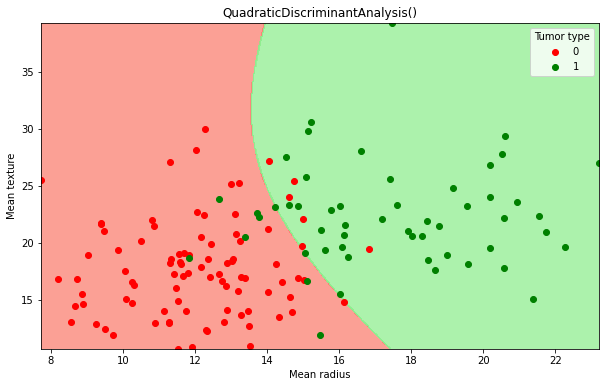

In [42]:
classifier = qda['classifier']

from matplotlib.colors import ListedColormap

# Prepare the space grid
X_set, y_set = sc_2.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.03), 
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.03))

# Decision areas
fig, axs = plt.subplots(1,1, figsize=(10,6))
axs.contourf(X1, X2, classifier.predict(sc_2.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
     alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))

# Scatter plot
for i, y_set_value in enumerate(np.unique(y_set)):
    axs.scatter(X_set[y_set == y_set_value, 0], X_set[y_set == y_set_value, 1], color = ['red', 'green'][i], label = y_set_value)

# Figure parameters
axs.set_xlim(X_set[:,0].min(), X_set[:,0].max())
axs.set_ylim(X_set[:,1].min(), X_set[:,1].max())
axs.legend(title='Tumor type')
axs.set_title(str(classifier))
axs.set_xlabel('Mean radius')
axs.set_ylabel('Mean texture')

plt.show() 

* *Optional question: compare the performances of that three models*

In [43]:
classifier_list = [log_reg, lda, qda]

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

for classifier in classifier_list:
    print('\n===== ' + str(classifier['classifier']))
    classifier['y_pred'] = classifier['classifier'].predict(X_test)
    classifier['y_proba'] = classifier['classifier'].predict_proba(X_test)
    classifier['y_score'] = classifier['y_proba'][:,1]
    print('Accuracy: ' + str(round(accuracy_score(y_test, classifier['y_pred']),2)))
    print('Precision: ' + str(round(precision_score(y_test, classifier['y_pred']),2)))
    print('Recall: ' + str(round(recall_score(y_test, classifier['y_pred']),2)))
    print('AUC: ' + str(round(roc_auc_score(y_test, classifier['y_score']),2)))


===== LogisticRegression()
Accuracy: 0.9
Precision: 0.87
Recall: 0.87
AUC: 0.97

===== LinearDiscriminantAnalysis()
Accuracy: 0.9
Precision: 0.9
Recall: 0.81
AUC: 0.96

===== QuadraticDiscriminantAnalysis()
Accuracy: 0.9
Precision: 0.88
Recall: 0.83
AUC: 0.97


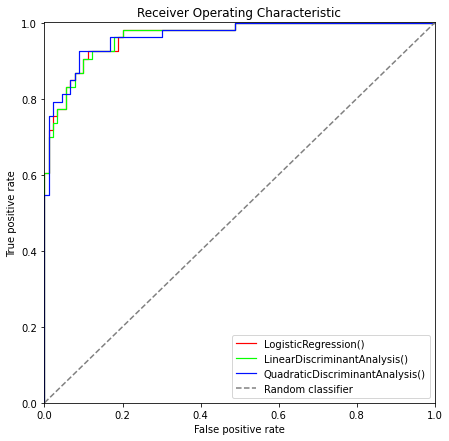

In [44]:
plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic')
    
# Plot ROC curve for each classifier
color_list = plt.cm.get_cmap('hsv', len(classifier_list)+1)
for i, classifier in enumerate(classifier_list):
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, classifier['y_score'])
    plt.plot(false_positive_rate, true_positive_rate, c=color_list(i), linewidth=1.2, label=str(classifier['classifier']))

# Plot ROC curve for a random classifier
plt.plot([0, 1], ls='--', c='grey', label='Random classifier')

plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()